In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
# Load the dataset
data = pd.read_csv('ford.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Select the relevant columns for the model
selected_columns = ['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
data = data[selected_columns + ['price']]

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['transmission', 'fuelType'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Normalize the features
X = (X - X.mean()) / X.std()

# Add a column of ones as the bias term
X = np.column_stack((np.ones(len(X)), X))

# Initialize model parameters
theta = np.zeros(X.shape[1])


Learned Parameters:
[11862.55127139  2824.76607459 -2561.66824758   376.59145716
 -1608.51136138   799.23806461   455.61479736   375.467141
    84.50460403   321.95284241    40.56822159 -1405.65438025]


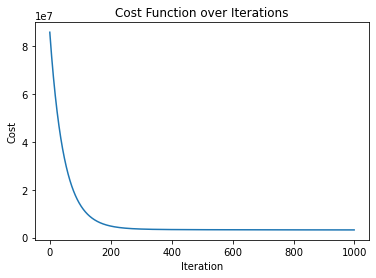

In [26]:




# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Gradient descent
num_samples = len(X)
cost_history = []
for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X, theta)
    
    # Calculate the difference between predictions and actual values
    error = predictions - y
    
    # Update parameters using gradient descent
    theta -= (learning_rate / num_samples) * np.dot(X.T, error)
    
    # Calculate the cost function (Mean Squared Error)
    cost = np.sum(error ** 2) / (2 * num_samples)
    cost_history.append(cost)

# Print the learned parameters
print("Learned Parameters:")
print(theta)

# Plot the cost function over iterations
import matplotlib.pyplot as plt
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()


Observations:
with normal gradient descent my learning parameters shows: